# CHAPTER 2 - The Tools of the Trade in Quantum Computing - Qiskit Code

*Note*: You may skip the following two cells if you have alredy installed the right versions of all the libraries mentioned in *Appendix D*. This will likely NOT be the case if you are running this notebook on a cloud service such as Google Colab.

In [1]:
#pip install qiskit==0.39.2

In [2]:
#pip install pylatexenc==2.10

In [3]:
from qiskit import *

In [4]:
qreg1 = QuantumRegister(size = 2, name = "qrg1")
qreg2 = QuantumRegister(1, "qrg2")
creg = ClassicalRegister(1, "oldschool")

qc = QuantumCircuit(qreg1, creg, qreg2)

In [5]:
qc.draw()

qrg1_0: 
             
     qrg1_1: 
             
       qrg2: 
             
oldschool: 1/

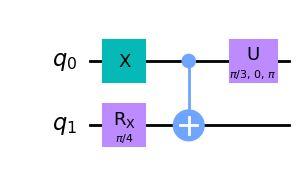

In [6]:
import numpy as np

qc = QuantumCircuit(2) # Initialise the circuit.

# We can now apply the gates sequentially.
qc.x(0)
qc.rx(np.pi/4, 1)
qc.cx(0, 1)
qc.u(np.pi/3, 0, np.pi, 0)

qc.draw("mpl")

In [7]:
from qiskit.providers.aer import AerSimulator

In [8]:
sim = AerSimulator()
sim_GPU = AerSimulator(device = 'GPU')

In [9]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.measure(range(2), range(2))

job = execute(qc, sim, shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 517, '01': 507}


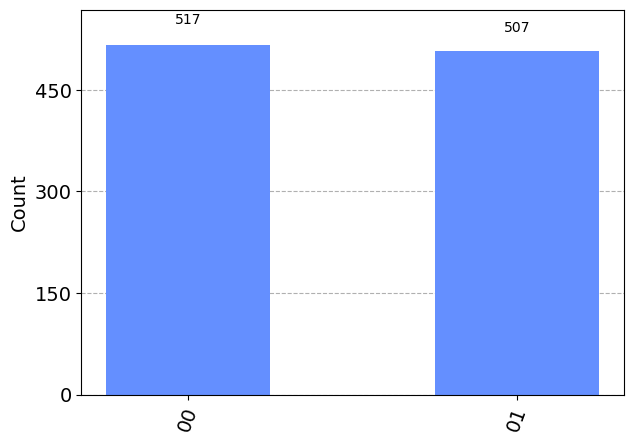

In [10]:
from qiskit.visualization import *
plot_histogram(counts)

In [11]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.save_statevector()
qc.measure(0,0)
qc.measure(1,1)

result = execute(qc, sim, shots = 1024).result()
sv = result.get_statevector()
print(sv)
counts = result.get_counts()
print(counts)

Statevector([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j,
             0.        +0.j],
            dims=(2, 2))
{'00': 484, '01': 540}


In [12]:
sim_u = AerSimulator(method = 'unitary')

qc = QuantumCircuit(1)
qc.h(0)
qc.save_unitary()

result = execute(qc, sim_u).result()
U = result.get_unitary(decimals = 4)
print(U)

Operator([[ 0.7071+0.j,  0.7071-0.j],
          [ 0.7071+0.j, -0.7071+0.j]],
         input_dims=(2,), output_dims=(2,))


*Note*: In the following cell, you need to replace "1234" with your actual IBM token. Refer to *Appendix D* in the book for instructions on how to create an account and get your token. Be very careful not to disclose your token to anyone!

In [13]:
ibm_token="1234"
IBMQ.save_account(ibm_token)

/tmp/ipykernel_23774/3922588562.py:2: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.save_account(ibm_token)
configrc.store_credentials:WARNING:2023-06-16 19:21:28,945: Credentials already present. Set overwrite=True to overwrite.


In [14]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))

[<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [15]:
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)

In [16]:
from qiskit.providers.ibmq import *
dev = least_busy(dev_list)

In [17]:
from qiskit.providers.ibmq.job import job_monitor

# Let us set up a simple circuit.
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.measure_all()

# First, we run the circuit using the statevector simulator.
sim = AerSimulator()
result = execute(qc, sim, shots = 1024).result()
counts_sim = result.get_counts()

# Now we run it on the real device that we selected before.
job = execute(qc, dev, shots = 1024)
job_monitor(job)

result = job.result()
counts_dev = result.get_counts()

Job Status: job is queued (None) [Est. wait time: ]

In [ ]:
print(counts_sim)
print(counts_dev)